In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from os import listdir

In [2]:
folder_path = 'MyData/User2'
target_path = 'ProcessedData/User2'

In [3]:
recommendations_data = pd.read_json(target_path + '/recommendations_songs.json').T

numerical_features = ["danceability","energy","loudness","speechiness","acousticness","instrumentalness","liveness","valence", "tempo","popularity"]
other_features = ["mode","key","id","duration_ms","artists","name","id","artists","album"]

numerical_recommendations_data = recommendations_data[numerical_features]
numerical_recommendations_data.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity
0MsjqGeYAEPviKkIqFE0oy,0.777,0.857,-5.304,0.11,0.206,0,0.171,0.566,112.002,55
5NhOdJFms3DKXuitc9rSoL,0.765,0.595,-6.442,0.084,0.00664,0,0.344,0.737,136.963,62
0UseaOy4Qai0q8ByAX09Va,0.715,0.518,-8.749,0.11,0.134,0,0.151,0.422,77.476,56
7qBmVFdIHnX9bHFcLNWD5F,0.816,0.625,-6.174,0.0444,0.797,3.54e-06,0.108,0.757,97.962,56
70APCdHsWV5BEsacwjzXmd,0.718,0.416,-8.758,0.0675,0.796,1.85e-06,0.0992,0.642,132.074,69


In [4]:
track_np = np.array(numerical_recommendations_data.values)
print(track_np)

[[0.777 0.857 -5.304 ... 0.5660000000000001 112.002 55]
 [0.765 0.595 -6.442 ... 0.737 136.963 62]
 [0.715 0.518 -8.749 ... 0.422 77.476 56]
 ...
 [0.437 0.35100000000000003 -6.823 ... 0.383 68.659 71]
 [0.309 0.544 -9.621 ... 0.16 180.979 66]
 [0.616 0.438 -5.968 ... 0.386 135.929 74]]


In [5]:
from sklearn.preprocessing import MinMaxScaler

minMaxScaler = MinMaxScaler().fit(track_np)
track_np = minMaxScaler.transform(track_np)

print(track_np)

[[0.77702109 0.855294   0.7614447  ... 0.55674316 0.35455331 0.55      ]
 [0.76384007 0.58830123 0.72203754 ... 0.7359321  0.50653953 0.62      ]
 [0.70891916 0.50983389 0.64214973 ... 0.40584722 0.14432632 0.56      ]
 ...
 [0.40355888 0.33965148 0.7088441  ... 0.36497957 0.09064007 0.71      ]
 [0.26296134 0.53632936 0.61195374 ... 0.13130043 0.77455064 0.66      ]
 [0.60017575 0.42830939 0.73845142 ... 0.36812323 0.50024356 0.74      ]]


In [6]:
track_data_normalized = pd.DataFrame(track_np,columns=numerical_features,index=recommendations_data.index)
track_data_normalized.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity
0MsjqGeYAEPviKkIqFE0oy,0.777021,0.855294,0.761445,0.094270,0.209561,0.000000,0.162415,0.556743,0.354553,0.55
5NhOdJFms3DKXuitc9rSoL,0.763840,0.588301,0.722038,0.066000,0.006753,0.000000,0.346301,0.735932,0.506540,0.62
0UseaOy4Qai0q8ByAX09Va,0.708919,0.509834,0.642150,0.094270,0.136316,0.000000,0.141156,0.405847,0.144326,0.56
7qBmVFdIHnX9bHFcLNWD5F,0.819859,0.618873,0.731318,0.022942,0.810783,0.000004,0.095451,0.756890,0.269064,0.56
70APCdHsWV5BEsacwjzXmd,0.712214,0.405890,0.641838,0.048059,0.809766,0.000002,0.086097,0.636383,0.476771,0.69


In [7]:
for feature in other_features:
    track_data_normalized[feature] = recommendations_data[feature]
track_data_normalized.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity,mode,key,id,duration_ms,artists,name,album
0MsjqGeYAEPviKkIqFE0oy,0.777021,0.855294,0.761445,0.094270,0.209561,0.000000,0.162415,0.556743,0.354553,0.55,1,1,0MsjqGeYAEPviKkIqFE0oy,218584,[2TH],Ne fuis pas,Rêver plus grand
5NhOdJFms3DKXuitc9rSoL,0.763840,0.588301,0.722038,0.066000,0.006753,0.000000,0.346301,0.735932,0.506540,0.62,0,0,5NhOdJFms3DKXuitc9rSoL,163387,[Gambi],PUFF PUFF PUFF,LA VIE EST BELLE
0UseaOy4Qai0q8ByAX09Va,0.708919,0.509834,0.642150,0.094270,0.136316,0.000000,0.141156,0.405847,0.144326,0.56,1,2,0UseaOy4Qai0q8ByAX09Va,201773,[KIKESA],Dernier texto,PUZZLE
7qBmVFdIHnX9bHFcLNWD5F,0.819859,0.618873,0.731318,0.022942,0.810783,0.000004,0.095451,0.756890,0.269064,0.56,1,2,7qBmVFdIHnX9bHFcLNWD5F,141997,[SenSey'],Je t'aime,Sans le bandeau
70APCdHsWV5BEsacwjzXmd,0.712214,0.405890,0.641838,0.048059,0.809766,0.000002,0.086097,0.636383,0.476771,0.69,1,5,70APCdHsWV5BEsacwjzXmd,218481,[Dadju],Amour toxic,Poison Ou Antidote


## Process data to show songs distances

### Clusterisation

In [8]:
from sklearn.cluster import KMeans
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(track_np)

In [9]:
kmeans_cluster_labels = kmeans.labels_
print(kmeans_cluster_labels)

[2 2 1 ... 0 1 1]


In [10]:
kmeans_cluster_centers = kmeans.cluster_centers_
print(kmeans_cluster_centers)

[[0.64809964 0.49144678 0.64011672 0.12909435 0.63364776 0.01026233
  0.13159458 0.42692387 0.37767149 0.50412698]
 [0.65760718 0.65897938 0.71710462 0.11580133 0.12407403 0.01390861
  0.16666862 0.33220798 0.41161319 0.54133862]
 [0.74979992 0.73773697 0.74097468 0.12000483 0.15234843 0.0122299
  0.16615476 0.71670618 0.41480146 0.51290609]
 [0.66747217 0.74350425 0.67758592 0.05273262 0.12350376 0.7381113
  0.15084295 0.44176436 0.43388886 0.38438406]]


In [11]:
track_data_normalized["kmeans_cluster"] = kmeans_cluster_labels
track_data_normalized.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity,mode,key,id,duration_ms,artists,name,album,kmeans_cluster
0MsjqGeYAEPviKkIqFE0oy,0.777021,0.855294,0.761445,0.094270,0.209561,0.000000,0.162415,0.556743,0.354553,0.55,1,1,0MsjqGeYAEPviKkIqFE0oy,218584,[2TH],Ne fuis pas,Rêver plus grand,2
5NhOdJFms3DKXuitc9rSoL,0.763840,0.588301,0.722038,0.066000,0.006753,0.000000,0.346301,0.735932,0.506540,0.62,0,0,5NhOdJFms3DKXuitc9rSoL,163387,[Gambi],PUFF PUFF PUFF,LA VIE EST BELLE,2
0UseaOy4Qai0q8ByAX09Va,0.708919,0.509834,0.642150,0.094270,0.136316,0.000000,0.141156,0.405847,0.144326,0.56,1,2,0UseaOy4Qai0q8ByAX09Va,201773,[KIKESA],Dernier texto,PUZZLE,1
7qBmVFdIHnX9bHFcLNWD5F,0.819859,0.618873,0.731318,0.022942,0.810783,0.000004,0.095451,0.756890,0.269064,0.56,1,2,7qBmVFdIHnX9bHFcLNWD5F,141997,[SenSey'],Je t'aime,Sans le bandeau,0
70APCdHsWV5BEsacwjzXmd,0.712214,0.405890,0.641838,0.048059,0.809766,0.000002,0.086097,0.636383,0.476771,0.69,1,5,70APCdHsWV5BEsacwjzXmd,218481,[Dadju],Amour toxic,Poison Ou Antidote,0


In [12]:
# sub-clusterisation : each cluster is divided into small clusters 
n_sub_clusters = 10 
track_data_normalized["kmeans_subcluster"] = 0

for i in range(n_clusters):
    num_track_data_np = np.array(track_data_normalized[track_data_normalized["kmeans_cluster"]==i][numerical_features])

    subkmeans = KMeans(n_clusters=n_sub_clusters, random_state=0).fit(num_track_data_np)

    track_data_normalized.loc[track_data_normalized["kmeans_cluster"]==i,"kmeans_subcluster"] = subkmeans.labels_

track_data_normalized.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity,mode,key,id,duration_ms,artists,name,album,kmeans_cluster,kmeans_subcluster
0MsjqGeYAEPviKkIqFE0oy,0.777021,0.855294,0.761445,0.094270,0.209561,0.000000,0.162415,0.556743,0.354553,0.55,1,1,0MsjqGeYAEPviKkIqFE0oy,218584,[2TH],Ne fuis pas,Rêver plus grand,2,7
5NhOdJFms3DKXuitc9rSoL,0.763840,0.588301,0.722038,0.066000,0.006753,0.000000,0.346301,0.735932,0.506540,0.62,0,0,5NhOdJFms3DKXuitc9rSoL,163387,[Gambi],PUFF PUFF PUFF,LA VIE EST BELLE,2,0
0UseaOy4Qai0q8ByAX09Va,0.708919,0.509834,0.642150,0.094270,0.136316,0.000000,0.141156,0.405847,0.144326,0.56,1,2,0UseaOy4Qai0q8ByAX09Va,201773,[KIKESA],Dernier texto,PUZZLE,1,8
7qBmVFdIHnX9bHFcLNWD5F,0.819859,0.618873,0.731318,0.022942,0.810783,0.000004,0.095451,0.756890,0.269064,0.56,1,2,7qBmVFdIHnX9bHFcLNWD5F,141997,[SenSey'],Je t'aime,Sans le bandeau,0,9
70APCdHsWV5BEsacwjzXmd,0.712214,0.405890,0.641838,0.048059,0.809766,0.000002,0.086097,0.636383,0.476771,0.69,1,5,70APCdHsWV5BEsacwjzXmd,218481,[Dadju],Amour toxic,Poison Ou Antidote,0,9


### Dimension reduction with PCA

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(track_np)
print(pca.components_)
print(pca.explained_variance_ratio_)

[[-0.14530892 -0.45164598 -0.17922085  0.01960184  0.71010892 -0.0491576
  -0.07115688 -0.4733142  -0.07960588  0.01729172]
 [ 0.23709846 -0.07054986 -0.03171221  0.07658478  0.50155709 -0.19860144
  -0.06383221  0.79601205 -0.03163607 -0.04715422]]
[0.29177335 0.18462154]


In [14]:
# print(np.sum(pca.explained_variance_ratio_))
print(pca.explained_variance_)

[0.08307345 0.05256528]


In [15]:
print(numerical_features)

['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'popularity']


In [16]:
track_np_pca = pca.transform(track_np)

In [17]:
track_data_normalized["x"] = track_np_pca[:,0]
track_data_normalized["y"] = track_np_pca[:,1]
track_data_normalized.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity,...,key,id,duration_ms,artists,name,album,kmeans_cluster,kmeans_subcluster,x,y
0MsjqGeYAEPviKkIqFE0oy,0.777021,0.855294,0.761445,0.094270,0.209561,0.000000,0.162415,0.556743,0.354553,0.55,...,1,0MsjqGeYAEPviKkIqFE0oy,218584,[2TH],Ne fuis pas,Rêver plus grand,2,7,-0.145700,0.032203
5NhOdJFms3DKXuitc9rSoL,0.763840,0.588301,0.722038,0.066000,0.006753,0.000000,0.346301,0.735932,0.506540,0.62,...,0,5NhOdJFms3DKXuitc9rSoL,163387,[Gambi],PUFF PUFF PUFF,LA VIE EST BELLE,2,0,-0.269491,0.068068
0UseaOy4Qai0q8ByAX09Va,0.708919,0.509834,0.642150,0.094270,0.136316,0.000000,0.141156,0.405847,0.144326,0.56,...,2,0UseaOy4Qai0q8ByAX09Va,201773,[KIKESA],Dernier texto,PUZZLE,1,8,0.079432,-0.105104
7qBmVFdIHnX9bHFcLNWD5F,0.819859,0.618873,0.731318,0.022942,0.810783,0.000004,0.095451,0.756890,0.269064,0.56,...,2,7qBmVFdIHnX9bHFcLNWD5F,141997,[SenSey'],Je t'aime,Sans le bandeau,0,9,0.302799,0.521905
70APCdHsWV5BEsacwjzXmd,0.712214,0.405890,0.641838,0.048059,0.809766,0.000002,0.086097,0.636383,0.476771,0.69,...,5,70APCdHsWV5BEsacwjzXmd,218481,[Dadju],Amour toxic,Poison Ou Antidote,0,9,0.473857,0.407631


In [18]:
cluster_centers_pca = pca.transform(kmeans_cluster_centers)
print(cluster_centers_pca)

[[ 0.42143907  0.14454656]
 [ 0.00857772 -0.2052449 ]
 [-0.20712178  0.13247494]
 [-0.11640555 -0.26164501]]


In [19]:
def comput_dist(x,y,cluster):
    return 1000*np.sqrt((x-cluster_centers_pca[cluster][0])**2 + (y-cluster_centers_pca[cluster][1])**2)

track_data_normalized["dist"] = track_data_normalized.apply(lambda x: comput_dist(x['x'],x['y'],x['kmeans_cluster']), axis=1)

track_data_normalized.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity,...,id,duration_ms,artists,name,album,kmeans_cluster,kmeans_subcluster,x,y,dist
0MsjqGeYAEPviKkIqFE0oy,0.777021,0.855294,0.761445,0.094270,0.209561,0.000000,0.162415,0.556743,0.354553,0.55,...,0MsjqGeYAEPviKkIqFE0oy,218584,[2TH],Ne fuis pas,Rêver plus grand,2,7,-0.145700,0.032203,117.589035
5NhOdJFms3DKXuitc9rSoL,0.763840,0.588301,0.722038,0.066000,0.006753,0.000000,0.346301,0.735932,0.506540,0.62,...,5NhOdJFms3DKXuitc9rSoL,163387,[Gambi],PUFF PUFF PUFF,LA VIE EST BELLE,2,0,-0.269491,0.068068,89.655915
0UseaOy4Qai0q8ByAX09Va,0.708919,0.509834,0.642150,0.094270,0.136316,0.000000,0.141156,0.405847,0.144326,0.56,...,0UseaOy4Qai0q8ByAX09Va,201773,[KIKESA],Dernier texto,PUZZLE,1,8,0.079432,-0.105104,122.672219
7qBmVFdIHnX9bHFcLNWD5F,0.819859,0.618873,0.731318,0.022942,0.810783,0.000004,0.095451,0.756890,0.269064,0.56,...,7qBmVFdIHnX9bHFcLNWD5F,141997,[SenSey'],Je t'aime,Sans le bandeau,0,9,0.302799,0.521905,395.568911
70APCdHsWV5BEsacwjzXmd,0.712214,0.405890,0.641838,0.048059,0.809766,0.000002,0.086097,0.636383,0.476771,0.69,...,70APCdHsWV5BEsacwjzXmd,218481,[Dadju],Amour toxic,Poison Ou Antidote,0,9,0.473857,0.407631,268.255141


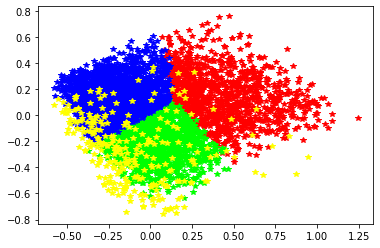

In [20]:
colors = ["#FF0000","#00FF00","#0000FF","#FFFF00","#00FFFF","#000000","#AA4422",
"#2244AA","#4422AA","#22AA44","#44AA22","#AAFF88"]
plt.figure()
for i in range(n_clusters):
    plt.plot(track_data_normalized[track_data_normalized["kmeans_cluster"]==i]["x"],track_data_normalized[track_data_normalized["kmeans_cluster"]==i]["y"],"*",color=colors[i])
plt.show()

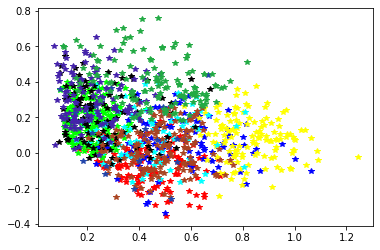

In [21]:
colors = ["#FF0000","#00FF00","#0000FF","#FFFF00","#00FFFF","#000000","#AA4422",
"#2244AA","#4422AA","#22AA44","#44AA22","#AAFF88"]
plt.figure()
for i in range(n_sub_clusters):
    plt.plot(track_data_normalized[track_data_normalized["kmeans_cluster"]==0][track_data_normalized["kmeans_subcluster"]==i]["x"],track_data_normalized[track_data_normalized["kmeans_cluster"]==0][track_data_normalized["kmeans_subcluster"]==i]["y"],"*",color=colors[i])
plt.show()

In [22]:
songs_df = track_data_normalized[["name","kmeans_cluster","kmeans_subcluster","x","y","dist","id","artists","album"]+numerical_features]
songs_df.head()

,name,kmeans_cluster,kmeans_subcluster,x,y,dist,id,artists,album,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity
0MsjqGeYAEPviKkIqFE0oy,Ne fuis pas,2,7,-0.145700,0.032203,117.589035,0MsjqGeYAEPviKkIqFE0oy,[2TH],Rêver plus grand,0.777021,0.855294,0.761445,0.094270,0.209561,0.000000,0.162415,0.556743,0.354553,0.55
5NhOdJFms3DKXuitc9rSoL,PUFF PUFF PUFF,2,0,-0.269491,0.068068,89.655915,5NhOdJFms3DKXuitc9rSoL,[Gambi],LA VIE EST BELLE,0.763840,0.588301,0.722038,0.066000,0.006753,0.000000,0.346301,0.735932,0.506540,0.62
0UseaOy4Qai0q8ByAX09Va,Dernier texto,1,8,0.079432,-0.105104,122.672219,0UseaOy4Qai0q8ByAX09Va,[KIKESA],PUZZLE,0.708919,0.509834,0.642150,0.094270,0.136316,0.000000,0.141156,0.405847,0.144326,0.56
7qBmVFdIHnX9bHFcLNWD5F,Je t'aime,0,9,0.302799,0.521905,395.568911,7qBmVFdIHnX9bHFcLNWD5F,[SenSey'],Sans le bandeau,0.819859,0.618873,0.731318,0.022942,0.810783,0.000004,0.095451,0.756890,0.269064,0.56
70APCdHsWV5BEsacwjzXmd,Amour toxic,0,9,0.473857,0.407631,268.255141,70APCdHsWV5BEsacwjzXmd,[Dadju],Poison Ou Antidote,0.712214,0.405890,0.641838,0.048059,0.809766,0.000002,0.086097,0.636383,0.476771,0.69


In [23]:
songs_df.shape

(5854, 19)

In [24]:
write_songs = True
if write_songs:
    songs_df.T.to_json(target_path+'/songs_json.json')

In [25]:
track_data = pd.read_json(target_path+'/track_data.json')
track_data = track_data.loc[["danceability","energy","loudness","speechiness","acousticness","instrumentalness","liveness","valence", "tempo","duration_ms","popularity","artist","album","id"]].T
track_data.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity,artist,album,id
Vivre,0.776,0.688,-7.488,0.0535,0.381,0,0.221,0.59,111.996,185187,66,[47ter],Vivre,1RCBTBrZMvbtlqZeZH1nzT
Dieu merci,0.718,0.524,-7.183,0.0587,0.395,0,0.215,0.825,133.998,211649,70,"[Dadju, Tiakola]",Dieu merci,4kTF7OQVjTSZ5zdRqo8zxx
Hopeless Romantic (feat. Swae Lee),0.877,0.477,-7.379,0.0587,0.307,0,0.0929,0.552,127.023,226743,71,"[Wiz Khalifa, Swae Lee]",Rolling Papers 2,7IBSffWIu7P2MC7kMwy2FM
Ela É do Tipo (feat. Drake) - Remix,0.576,0.524,-5.428,0.24,0.89,0,0.108,0.715,99.387,212433,61,"[MC Kevin o Chris, Drake]",Ela É do Tipo (feat. Drake) [Remix],7qLnSuxwLNlcapat8OCWZp
"Dreams, Fairytales, Fantasies (feat. Brent Faiyaz & Salaam Remi)",0.737,0.597,-7.333,0.119,0.292,0,0.13,0.449,92.049,222987,73,"[A$AP Ferg, Brent Faiyaz, Salaam Remi]",Floor Seats,5oady7OSE7dH7LHiqmb3Cr


In [26]:
track_np_user = np.array(track_data[numerical_features].values)
print(track_np_user)

[[0.776 0.6880000000000001 -7.4879999999999995 ... 0.59 111.996 66]
 [0.718 0.524 -7.183 ... 0.8250000000000001 133.998 70]
 [0.877 0.47700000000000004 -7.379 ... 0.552 127.023 71]
 ...
 [0.729 0.965 -5.711 ... 0.744 125.021 59]
 [0.744 0.5740000000000001 -5.91 ... 0.518 138.892 44]
 [0.358 0.557 -7.398 ... 0.494 85.043 84]]


In [27]:
track_np_user = minMaxScaler.transform(track_np_user)

print(track_np_user)

[[0.77592267 0.68307347 0.68581619 ... 0.58189249 0.35451678 0.66      ]
 [0.71221441 0.51594823 0.69637787 ... 0.82814629 0.4884858  0.7       ]
 [0.88686292 0.46805258 0.68959069 ... 0.54207272 0.44601539 0.71      ]
 ...
 [0.72429701 0.96535208 0.74735092 ... 0.74326732 0.43382532 0.59      ]
 [0.74077329 0.56690105 0.74045987 ... 0.50644451 0.51828511 0.44      ]
 [0.31678383 0.54957709 0.68893275 ... 0.48129519 0.19040138 0.84      ]]


In [28]:
track_data_normalized = pd.DataFrame(track_np_user,columns=numerical_features,index=track_data.index)
track_data_normalized.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity
Vivre,0.775923,0.683073,0.685816,0.032837,0.387588,0.0,0.215561,0.581892,0.354517,0.66
Dieu merci,0.712214,0.515948,0.696378,0.038491,0.401830,0.0,0.209184,0.828146,0.488486,0.70
Hopeless Romantic (feat. Swae Lee),0.886863,0.468053,0.689591,0.038491,0.312308,0.0,0.079401,0.542073,0.446015,0.71
Ela É do Tipo (feat. Drake) - Remix,0.556239,0.515948,0.757151,0.235620,0.905391,0.0,0.095451,0.712879,0.277741,0.61
"Dreams, Fairytales, Fantasies (feat. Brent Faiyaz & Salaam Remi)",0.733084,0.590339,0.691184,0.104056,0.297049,0.0,0.118835,0.434140,0.233061,0.73


In [29]:
track_data_normalized["artist"] = track_data["artist"]
track_data_normalized["album"] = track_data["album"]
track_data_normalized["id"] = track_data["id"]
track_data_normalized["name"] = track_data.index
track_data_normalized["duration_ms"] = track_data["duration_ms"]
track_data_normalized.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity,artist,album,id,name,duration_ms
Vivre,0.775923,0.683073,0.685816,0.032837,0.387588,0.0,0.215561,0.581892,0.354517,0.66,[47ter],Vivre,1RCBTBrZMvbtlqZeZH1nzT,Vivre,185187
Dieu merci,0.712214,0.515948,0.696378,0.038491,0.401830,0.0,0.209184,0.828146,0.488486,0.70,"[Dadju, Tiakola]",Dieu merci,4kTF7OQVjTSZ5zdRqo8zxx,Dieu merci,211649
Hopeless Romantic (feat. Swae Lee),0.886863,0.468053,0.689591,0.038491,0.312308,0.0,0.079401,0.542073,0.446015,0.71,"[Wiz Khalifa, Swae Lee]",Rolling Papers 2,7IBSffWIu7P2MC7kMwy2FM,Hopeless Romantic (feat. Swae Lee),226743
Ela É do Tipo (feat. Drake) - Remix,0.556239,0.515948,0.757151,0.235620,0.905391,0.0,0.095451,0.712879,0.277741,0.61,"[MC Kevin o Chris, Drake]",Ela É do Tipo (feat. Drake) [Remix],7qLnSuxwLNlcapat8OCWZp,Ela É do Tipo (feat. Drake) - Remix,212433
"Dreams, Fairytales, Fantasies (feat. Brent Faiyaz & Salaam Remi)",0.733084,0.590339,0.691184,0.104056,0.297049,0.0,0.118835,0.434140,0.233061,0.73,"[A$AP Ferg, Brent Faiyaz, Salaam Remi]",Floor Seats,5oady7OSE7dH7LHiqmb3Cr,"Dreams, Fairytales, Fantasies (feat. Brent Fai...",222987


In [30]:
folder_path
files = [folder_path + '/' + x for x in listdir(folder_path)
             if x.split('.')[0][:-1] == 'StreamingHistory']
print(files)

['MyData/User2/StreamingHistory0.json', 'MyData/User2/StreamingHistory1.json']


In [31]:
streaming_history_df = pd.read_json(files[0])
if len(files) > 1 :
    for file_path in files[1:]:
        streaming_history_df = pd.concat((streaming_history_df,pd.read_json(file_path)))
streaming_history_df.head()

,endTime,artistName,trackName,msPlayed
0,2020-02-06 16:53,Mister V,Gang,169706
1,2020-02-06 16:55,Mister V,Payakaroon,74979
2,2020-02-06 16:58,Mister V,Pirelli,214653
3,2020-02-06 17:01,Mister V,Menace,184476
4,2020-02-07 17:05,Mister V,Menace,9949


In [32]:
streaming_history_df.shape

(10980, 4)

In [33]:
countPerTrack = pd.value_counts(streaming_history_df["trackName"])
countPerTrack.head()

Validée           80
Savon             64
Ne reviens pas    62
Changer de vie    55
Joli bébé         54
Name: trackName, dtype: int64

In [34]:
msPlayedSum = streaming_history_df.groupby("trackName").agg({"msPlayed":["sum"]})
msPlayedSum.head()

,msPlayed
,sum
trackName,
#B7,417894
#DansLeTierquar (Lyon),62330
#DansLeTierquar (Marseille),22352
#DansLeTierquar (Nantes),2264
#Hulahoop,1456


In [35]:
track_data_normalized["name"] = track_data_normalized.index

In [36]:
def trackCount(x):
    if countPerTrack.loc[x["name"]]:
        return countPerTrack.loc[x["name"]]
    return 0

track_data_normalized["countPerTrack"] = track_data_normalized.apply(lambda x : trackCount(x),axis=1)

In [37]:
def trackMsPlayed(x):
    if msPlayedSum.loc[x["name"]][0]:
        return msPlayedSum.loc[x["name"]][0]
    return 0

track_data_normalized["msPlayedSum"] = track_data_normalized.apply(lambda x : trackMsPlayed(x),axis=1)

track_data_normalized.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity,artist,album,id,name,duration_ms,countPerTrack,msPlayedSum
Vivre,0.775923,0.683073,0.685816,0.032837,0.387588,0.0,0.215561,0.581892,0.354517,0.66,[47ter],Vivre,1RCBTBrZMvbtlqZeZH1nzT,Vivre,185187,7,1112404
Dieu merci,0.712214,0.515948,0.696378,0.038491,0.401830,0.0,0.209184,0.828146,0.488486,0.70,"[Dadju, Tiakola]",Dieu merci,4kTF7OQVjTSZ5zdRqo8zxx,Dieu merci,211649,7,450184
Hopeless Romantic (feat. Swae Lee),0.886863,0.468053,0.689591,0.038491,0.312308,0.0,0.079401,0.542073,0.446015,0.71,"[Wiz Khalifa, Swae Lee]",Rolling Papers 2,7IBSffWIu7P2MC7kMwy2FM,Hopeless Romantic (feat. Swae Lee),226743,2,227980
Ela É do Tipo (feat. Drake) - Remix,0.556239,0.515948,0.757151,0.235620,0.905391,0.0,0.095451,0.712879,0.277741,0.61,"[MC Kevin o Chris, Drake]",Ela É do Tipo (feat. Drake) [Remix],7qLnSuxwLNlcapat8OCWZp,Ela É do Tipo (feat. Drake) - Remix,212433,1,212432
"Dreams, Fairytales, Fantasies (feat. Brent Faiyaz & Salaam Remi)",0.733084,0.590339,0.691184,0.104056,0.297049,0.0,0.118835,0.434140,0.233061,0.73,"[A$AP Ferg, Brent Faiyaz, Salaam Remi]",Floor Seats,5oady7OSE7dH7LHiqmb3Cr,"Dreams, Fairytales, Fantasies (feat. Brent Fai...",222987,1,222986


In [38]:
with open(target_path + '/recommendations.json','r') as json_file:
    recommendations = json.load(json_file) 

In [39]:
def get_recommendations(x):
    if x["id"] in recommendations:
        return recommendations[x["id"]]
    else :
        return []

track_data_normalized["recommendations"] = track_data_normalized.apply(lambda x : get_recommendations(x),axis=1) 
track_data_normalized.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity,artist,album,id,name,duration_ms,countPerTrack,msPlayedSum,recommendations
Vivre,0.775923,0.683073,0.685816,0.032837,0.387588,0.0,0.215561,0.581892,0.354517,0.66,[47ter],Vivre,1RCBTBrZMvbtlqZeZH1nzT,Vivre,185187,7,1112404,"[0MsjqGeYAEPviKkIqFE0oy, 5NhOdJFms3DKXuitc9rSo..."
Dieu merci,0.712214,0.515948,0.696378,0.038491,0.401830,0.0,0.209184,0.828146,0.488486,0.70,"[Dadju, Tiakola]",Dieu merci,4kTF7OQVjTSZ5zdRqo8zxx,Dieu merci,211649,7,450184,"[2GsQgJ0xNluMnPOvCh851b, 5VLztEcDfe11GOVhK38r7..."
Hopeless Romantic (feat. Swae Lee),0.886863,0.468053,0.689591,0.038491,0.312308,0.0,0.079401,0.542073,0.446015,0.71,"[Wiz Khalifa, Swae Lee]",Rolling Papers 2,7IBSffWIu7P2MC7kMwy2FM,Hopeless Romantic (feat. Swae Lee),226743,2,227980,"[6vMQLnaxlPQwlyCXpRtTV0, 0VM5acl9Q1cPTZH9BvKI2..."
Ela É do Tipo (feat. Drake) - Remix,0.556239,0.515948,0.757151,0.235620,0.905391,0.0,0.095451,0.712879,0.277741,0.61,"[MC Kevin o Chris, Drake]",Ela É do Tipo (feat. Drake) [Remix],7qLnSuxwLNlcapat8OCWZp,Ela É do Tipo (feat. Drake) - Remix,212433,1,212432,"[5F8ffc8KWKNawllr5WsW0r, 3K16ZsnNjOTY1Esnrx0rQ..."
"Dreams, Fairytales, Fantasies (feat. Brent Faiyaz & Salaam Remi)",0.733084,0.590339,0.691184,0.104056,0.297049,0.0,0.118835,0.434140,0.233061,0.73,"[A$AP Ferg, Brent Faiyaz, Salaam Remi]",Floor Seats,5oady7OSE7dH7LHiqmb3Cr,"Dreams, Fairytales, Fantasies (feat. Brent Fai...",222987,1,222986,"[4IO2X2YoXoUMv0M2rwomLC, 11RIJRbBfyLlJut96itSF..."


In [40]:
# track_data_normalized.T.to_json(target_path + '/track_data_normalized.json')

In [41]:
user_track_data = track_data_normalized

In [42]:
numerical_user_track_data = user_track_data[numerical_features]

user_track_np = np.array(numerical_user_track_data.values)

print(user_track_np)

[[0.77592267 0.68307347 0.68581619 ... 0.58189249 0.35451678 0.66      ]
 [0.71221441 0.51594823 0.69637787 ... 0.82814629 0.4884858  0.7       ]
 [0.88686292 0.46805258 0.68959069 ... 0.54207272 0.44601539 0.71      ]
 ...
 [0.72429701 0.96535208 0.74735092 ... 0.74326732 0.43382532 0.59      ]
 [0.74077329 0.56690105 0.74045987 ... 0.50644451 0.51828511 0.44      ]
 [0.31678383 0.54957709 0.68893275 ... 0.48129519 0.19040138 0.84      ]]


In [43]:
user_cluster = kmeans.predict(user_track_np)
user_track_np_pca = pca.transform(user_track_np)

In [44]:
user_track_data_normalized = pd.DataFrame(user_track_np,columns=numerical_features,index=user_track_data.index)
user_track_data_normalized.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity
Vivre,0.775923,0.683073,0.685816,0.032837,0.387588,0.0,0.215561,0.581892,0.354517,0.66
Dieu merci,0.712214,0.515948,0.696378,0.038491,0.401830,0.0,0.209184,0.828146,0.488486,0.70
Hopeless Romantic (feat. Swae Lee),0.886863,0.468053,0.689591,0.038491,0.312308,0.0,0.079401,0.542073,0.446015,0.71
Ela É do Tipo (feat. Drake) - Remix,0.556239,0.515948,0.757151,0.235620,0.905391,0.0,0.095451,0.712879,0.277741,0.61
"Dreams, Fairytales, Fantasies (feat. Brent Faiyaz & Salaam Remi)",0.733084,0.590339,0.691184,0.104056,0.297049,0.0,0.118835,0.434140,0.233061,0.73


In [45]:
for feature in ["duration_ms","artist","album","countPerTrack","msPlayedSum","id","recommendations"]:
    user_track_data_normalized[feature] = user_track_data[feature]
user_track_data_normalized.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity,duration_ms,artist,album,countPerTrack,msPlayedSum,id,recommendations
Vivre,0.775923,0.683073,0.685816,0.032837,0.387588,0.0,0.215561,0.581892,0.354517,0.66,185187,[47ter],Vivre,7,1112404,1RCBTBrZMvbtlqZeZH1nzT,"[0MsjqGeYAEPviKkIqFE0oy, 5NhOdJFms3DKXuitc9rSo..."
Dieu merci,0.712214,0.515948,0.696378,0.038491,0.401830,0.0,0.209184,0.828146,0.488486,0.70,211649,"[Dadju, Tiakola]",Dieu merci,7,450184,4kTF7OQVjTSZ5zdRqo8zxx,"[2GsQgJ0xNluMnPOvCh851b, 5VLztEcDfe11GOVhK38r7..."
Hopeless Romantic (feat. Swae Lee),0.886863,0.468053,0.689591,0.038491,0.312308,0.0,0.079401,0.542073,0.446015,0.71,226743,"[Wiz Khalifa, Swae Lee]",Rolling Papers 2,2,227980,7IBSffWIu7P2MC7kMwy2FM,"[6vMQLnaxlPQwlyCXpRtTV0, 0VM5acl9Q1cPTZH9BvKI2..."
Ela É do Tipo (feat. Drake) - Remix,0.556239,0.515948,0.757151,0.235620,0.905391,0.0,0.095451,0.712879,0.277741,0.61,212433,"[MC Kevin o Chris, Drake]",Ela É do Tipo (feat. Drake) [Remix],1,212432,7qLnSuxwLNlcapat8OCWZp,"[5F8ffc8KWKNawllr5WsW0r, 3K16ZsnNjOTY1Esnrx0rQ..."
"Dreams, Fairytales, Fantasies (feat. Brent Faiyaz & Salaam Remi)",0.733084,0.590339,0.691184,0.104056,0.297049,0.0,0.118835,0.434140,0.233061,0.73,222987,"[A$AP Ferg, Brent Faiyaz, Salaam Remi]",Floor Seats,1,222986,5oady7OSE7dH7LHiqmb3Cr,"[4IO2X2YoXoUMv0M2rwomLC, 11RIJRbBfyLlJut96itSF..."


In [46]:
user_track_data_normalized["kmeans_cluster"] = user_cluster
user_track_data_normalized.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity,duration_ms,artist,album,countPerTrack,msPlayedSum,id,recommendations,kmeans_cluster
Vivre,0.775923,0.683073,0.685816,0.032837,0.387588,0.0,0.215561,0.581892,0.354517,0.66,185187,[47ter],Vivre,7,1112404,1RCBTBrZMvbtlqZeZH1nzT,"[0MsjqGeYAEPviKkIqFE0oy, 5NhOdJFms3DKXuitc9rSo...",2
Dieu merci,0.712214,0.515948,0.696378,0.038491,0.401830,0.0,0.209184,0.828146,0.488486,0.70,211649,"[Dadju, Tiakola]",Dieu merci,7,450184,4kTF7OQVjTSZ5zdRqo8zxx,"[2GsQgJ0xNluMnPOvCh851b, 5VLztEcDfe11GOVhK38r7...",2
Hopeless Romantic (feat. Swae Lee),0.886863,0.468053,0.689591,0.038491,0.312308,0.0,0.079401,0.542073,0.446015,0.71,226743,"[Wiz Khalifa, Swae Lee]",Rolling Papers 2,2,227980,7IBSffWIu7P2MC7kMwy2FM,"[6vMQLnaxlPQwlyCXpRtTV0, 0VM5acl9Q1cPTZH9BvKI2...",2
Ela É do Tipo (feat. Drake) - Remix,0.556239,0.515948,0.757151,0.235620,0.905391,0.0,0.095451,0.712879,0.277741,0.61,212433,"[MC Kevin o Chris, Drake]",Ela É do Tipo (feat. Drake) [Remix],1,212432,7qLnSuxwLNlcapat8OCWZp,"[5F8ffc8KWKNawllr5WsW0r, 3K16ZsnNjOTY1Esnrx0rQ...",0
"Dreams, Fairytales, Fantasies (feat. Brent Faiyaz & Salaam Remi)",0.733084,0.590339,0.691184,0.104056,0.297049,0.0,0.118835,0.434140,0.233061,0.73,222987,"[A$AP Ferg, Brent Faiyaz, Salaam Remi]",Floor Seats,1,222986,5oady7OSE7dH7LHiqmb3Cr,"[4IO2X2YoXoUMv0M2rwomLC, 11RIJRbBfyLlJut96itSF...",1


In [47]:
user_track_data_normalized["x"] = user_track_np_pca[:,0]
user_track_data_normalized["y"] = user_track_np_pca[:,1]
user_track_data_normalized.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity,duration_ms,artist,album,countPerTrack,msPlayedSum,id,recommendations,kmeans_cluster,x,y
Vivre,0.775923,0.683073,0.685816,0.032837,0.387588,0.0,0.215561,0.581892,0.354517,0.66,185187,[47ter],Vivre,7,1112404,1RCBTBrZMvbtlqZeZH1nzT,"[0MsjqGeYAEPviKkIqFE0oy, 5NhOdJFms3DKXuitc9rSo...",2,0.057231,0.142518
Dieu merci,0.712214,0.515948,0.696378,0.038491,0.401830,0.0,0.209184,0.828146,0.488486,0.70,211649,"[Dadju, Tiakola]",Dieu merci,7,450184,4kTF7OQVjTSZ5zdRqo8zxx,"[2GsQgJ0xNluMnPOvCh851b, 5VLztEcDfe11GOVhK38r7...",2,0.024226,0.336748
Hopeless Romantic (feat. Swae Lee),0.886863,0.468053,0.689591,0.038491,0.312308,0.0,0.079401,0.542073,0.446015,0.71,226743,"[Wiz Khalifa, Swae Lee]",Rolling Papers 2,2,227980,7IBSffWIu7P2MC7kMwy2FM,"[6vMQLnaxlPQwlyCXpRtTV0, 0VM5acl9Q1cPTZH9BvKI2...",2,0.106318,0.118289
Ela É do Tipo (feat. Drake) - Remix,0.556239,0.515948,0.757151,0.235620,0.905391,0.0,0.095451,0.712879,0.277741,0.61,212433,"[MC Kevin o Chris, Drake]",Ela É do Tipo (feat. Drake) [Remix],1,212432,7qLnSuxwLNlcapat8OCWZp,"[5F8ffc8KWKNawllr5WsW0r, 3K16ZsnNjOTY1Esnrx0rQ...",0,0.475318,0.491918
"Dreams, Fairytales, Fantasies (feat. Brent Faiyaz & Salaam Remi)",0.733084,0.590339,0.691184,0.104056,0.297049,0.0,0.118835,0.434140,0.233061,0.73,222987,"[A$AP Ferg, Brent Faiyaz, Salaam Remi]",Floor Seats,1,222986,5oady7OSE7dH7LHiqmb3Cr,"[4IO2X2YoXoUMv0M2rwomLC, 11RIJRbBfyLlJut96itSF...",1,0.129175,-0.012120


In [48]:
user_track_data_normalized["dist"] = user_track_data_normalized.apply(lambda x: comput_dist(x['x'],x['y'],x['kmeans_cluster']), axis=1)

user_track_data_normalized.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity,...,artist,album,countPerTrack,msPlayedSum,id,recommendations,kmeans_cluster,x,y,dist
Vivre,0.775923,0.683073,0.685816,0.032837,0.387588,0.0,0.215561,0.581892,0.354517,0.66,...,[47ter],Vivre,7,1112404,1RCBTBrZMvbtlqZeZH1nzT,"[0MsjqGeYAEPviKkIqFE0oy, 5NhOdJFms3DKXuitc9rSo...",2,0.057231,0.142518,264.543302
Dieu merci,0.712214,0.515948,0.696378,0.038491,0.401830,0.0,0.209184,0.828146,0.488486,0.70,...,"[Dadju, Tiakola]",Dieu merci,7,450184,4kTF7OQVjTSZ5zdRqo8zxx,"[2GsQgJ0xNluMnPOvCh851b, 5VLztEcDfe11GOVhK38r7...",2,0.024226,0.336748,308.625158
Hopeless Romantic (feat. Swae Lee),0.886863,0.468053,0.689591,0.038491,0.312308,0.0,0.079401,0.542073,0.446015,0.71,...,"[Wiz Khalifa, Swae Lee]",Rolling Papers 2,2,227980,7IBSffWIu7P2MC7kMwy2FM,"[6vMQLnaxlPQwlyCXpRtTV0, 0VM5acl9Q1cPTZH9BvKI2...",2,0.106318,0.118289,313.760410
Ela É do Tipo (feat. Drake) - Remix,0.556239,0.515948,0.757151,0.235620,0.905391,0.0,0.095451,0.712879,0.277741,0.61,...,"[MC Kevin o Chris, Drake]",Ela É do Tipo (feat. Drake) [Remix],1,212432,7qLnSuxwLNlcapat8OCWZp,"[5F8ffc8KWKNawllr5WsW0r, 3K16ZsnNjOTY1Esnrx0rQ...",0,0.475318,0.491918,351.524516
"Dreams, Fairytales, Fantasies (feat. Brent Faiyaz & Salaam Remi)",0.733084,0.590339,0.691184,0.104056,0.297049,0.0,0.118835,0.434140,0.233061,0.73,...,"[A$AP Ferg, Brent Faiyaz, Salaam Remi]",Floor Seats,1,222986,5oady7OSE7dH7LHiqmb3Cr,"[4IO2X2YoXoUMv0M2rwomLC, 11RIJRbBfyLlJut96itSF...",1,0.129175,-0.012120,227.685747


In [49]:
user_track_data_normalized["name"] = user_track_data_normalized.index
user_track_data_normalized.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity,...,album,countPerTrack,msPlayedSum,id,recommendations,kmeans_cluster,x,y,dist,name
Vivre,0.775923,0.683073,0.685816,0.032837,0.387588,0.0,0.215561,0.581892,0.354517,0.66,...,Vivre,7,1112404,1RCBTBrZMvbtlqZeZH1nzT,"[0MsjqGeYAEPviKkIqFE0oy, 5NhOdJFms3DKXuitc9rSo...",2,0.057231,0.142518,264.543302,Vivre
Dieu merci,0.712214,0.515948,0.696378,0.038491,0.401830,0.0,0.209184,0.828146,0.488486,0.70,...,Dieu merci,7,450184,4kTF7OQVjTSZ5zdRqo8zxx,"[2GsQgJ0xNluMnPOvCh851b, 5VLztEcDfe11GOVhK38r7...",2,0.024226,0.336748,308.625158,Dieu merci
Hopeless Romantic (feat. Swae Lee),0.886863,0.468053,0.689591,0.038491,0.312308,0.0,0.079401,0.542073,0.446015,0.71,...,Rolling Papers 2,2,227980,7IBSffWIu7P2MC7kMwy2FM,"[6vMQLnaxlPQwlyCXpRtTV0, 0VM5acl9Q1cPTZH9BvKI2...",2,0.106318,0.118289,313.760410,Hopeless Romantic (feat. Swae Lee)
Ela É do Tipo (feat. Drake) - Remix,0.556239,0.515948,0.757151,0.235620,0.905391,0.0,0.095451,0.712879,0.277741,0.61,...,Ela É do Tipo (feat. Drake) [Remix],1,212432,7qLnSuxwLNlcapat8OCWZp,"[5F8ffc8KWKNawllr5WsW0r, 3K16ZsnNjOTY1Esnrx0rQ...",0,0.475318,0.491918,351.524516,Ela É do Tipo (feat. Drake) - Remix
"Dreams, Fairytales, Fantasies (feat. Brent Faiyaz & Salaam Remi)",0.733084,0.590339,0.691184,0.104056,0.297049,0.0,0.118835,0.434140,0.233061,0.73,...,Floor Seats,1,222986,5oady7OSE7dH7LHiqmb3Cr,"[4IO2X2YoXoUMv0M2rwomLC, 11RIJRbBfyLlJut96itSF...",1,0.129175,-0.012120,227.685747,"Dreams, Fairytales, Fantasies (feat. Brent Fai..."


In [50]:
user_songs_df = user_track_data_normalized[["name","artist","album","kmeans_cluster","x","y","dist","countPerTrack","msPlayedSum","id","recommendations"] + numerical_features]
user_songs_df.reset_index(drop=True)
user_songs_df.head()

user_songs_df.T.to_json(target_path + "/user_songs_json.json")